In [1]:
# import usefull libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('crimes.csv')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
# show the last 5 rows of the data
data.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,NaN,Invest Cont,14500 HARTLAND ST


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [5]:
data["AREA NAME"].value_counts()

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64

In [6]:
data.describe()

,DR_NO,TIME OCC,Vict Age
count,1.857150e+05,185715.000000,185715.000000
mean,2.255781e+08,1300.024414,39.999257
std,5.017438e+06,655.753163,15.450227
min,2.009072e+08,1.000000,2.000000
25%,2.210108e+08,830.000000,28.000000
50%,2.220114e+08,1340.000000,37.000000
75%,2.310044e+08,1830.000000,50.000000
max,2.399097e+08,2359.000000,99.000000


In [7]:
percent_missing_values=data.isnull().sum()*100/data.shape[0]
percent_missing_values.sort_values(ascending=False)

Weapon Desc     60.422152
Vict Sex         0.005923
Vict Descent     0.005385
DR_NO            0.000000
Date Rptd        0.000000
DATE OCC         0.000000
TIME OCC         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Vict Age         0.000000
Status Desc      0.000000
LOCATION         0.000000
dtype: float64

In [8]:
# the top 5 weapons in the data

weapon = data["Weapon Desc"].value_counts().head(5)            
weapon          

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    39889
UNKNOWN WEAPON/OTHER WEAPON                        7376
VERBAL THREAT                                      5894
HAND GUN                                           4395
KNIFE WITH BLADE 6INCHES OR LESS                   1608
Name: count, dtype: int64

In [9]:

# create the binning for the 'Vict Age' column
bins = [0, 18, 25, 35, 45, 100]  

# create the labels for the bins
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Application of the binning
data['Age Group'] = pd.cut(data['Vict Age'], bins=bins, labels=labels, right=False)

# Display the number of crimes per age group
data['Age Group'].value_counts()


Age Group
Senior         63269
Young Adult    52299
Adult          42157
Teenager       23462
Child           4528
Name: count, dtype: int64

In [10]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'Age Group'],
      dtype='object')

In [11]:
#contigeny table
table = pd.crosstab(data["Age Group"], data["Vict Sex"]).astype(int)
table

Vict Sex,F,H,M,X
Age Group,,,,
Child,2275,0,2185,68
Teenager,11230,4,10014,2206
Young Adult,27615,11,24432,241
Adult,20242,6,21763,144
Senior,28492,9,34614,153


<Axes: xlabel='Age Group'>

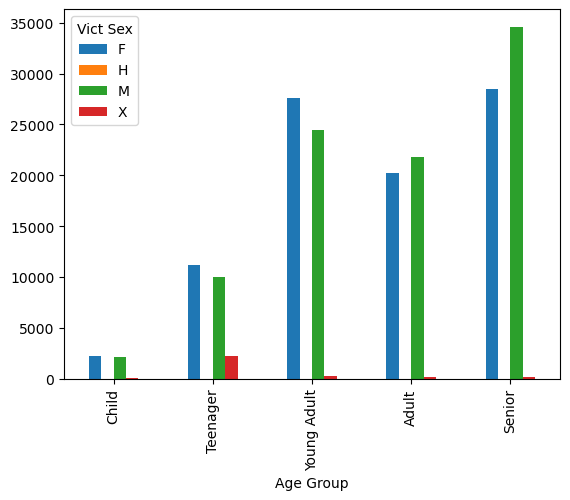

In [12]:
table.plot(kind="bar")